##  Auto1 data science challenge
#### Question 1 (10 Points) List as many use cases for the dataset as possible.

1. **Price recommendation:** Auto1 values and buys used cars from individuals, dealerships, and manufacturers, then sells them          for a profit to other dealerships/ Customers. **Price recommendation** feature will help Auto1 to determine, what must be right value/price of car based on car features. We can train machine learning model using given data, to help Auto1 predict **right price** for test/unseen data depending on features of the car.
2. **Similar car recommendation:** Customers often want to see and compare similar cars. Using given data, we can recommend            **similar cars **  to the query/given car.  This will enhance user experience and user engagement.
3. **Predict Fuel-efficiency:**  Predict **avg-mpg** where **avg-mpg** is the average of **city and highway mileage**. As a customer, When I am buying a used car, I want to be sure of car's health/efficiency apart from other things. **avg-mpg** is usually overstated by the car seller and must be believed with a pinch of salt.
     
     As a customer I would like **Auto1** run machine learning models and estimate this parameter(**avg-mpg**) for a used car.   **avg-mpg**  is also  one  of the indicators of healthy car.
     
     As a customer I want to know what my  car **avg-mpg** is going to be in a world where  petrol/disel rates go up everyday. It would be great help for the user         if we can predict the **avg-mpg** using  features of cars.
4. **Symboling:** Predict symboling ***[ 3,  1,  2,  0, -1, -2]***  based on car feature.

#### By: Vijayendra

## 1. Import statements & Data Understanding

In [1]:
#import statements
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import explained_variance_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import feature_selection
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline

%matplotlib inline


c:\users\h213561\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dataDF = pd.read_csv("Auto1-DS-TestData.csv", sep = ",")
print("shape of dataDF {0}\n\n".format(dataDF.shape))
dataDF.info()

shape of dataDF (205, 26)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
hors

 * There are in all 205 records,26 features.
 * missing values are represented as(?) as opposed to NaN 
 * Some features such as price, normalized-losses, peak-rpm, horsepower, bore and stroke are represented as categorial because     of missing values(?).

In [3]:
dataDF['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

## 2. preprocessing
     2.1 Handling Missing Values
     2.2 Outlier detection

###  2.1 Handling missing values

In [4]:
dataDF.isin(['?']).sum(axis=0)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Missing values in various columns.
      1. normalized-losses  :  41
      2. num-of-doors      :    2
      3. bore               :   4
      4. stroke             :   4
      5. horsepower          :  2
      6. peak-rpm            :  2
      7. price               :  4
      
There are various stategies to handle missing values. As there are only 206 records, we will not throway missing records, instead **carefully  Intelligently** inpute them.

#### Impute num-of-doors feature

In [5]:
dataDF[dataDF['num-of-doors'] =='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [6]:
print(dataDF[dataDF['body-style']=='sedan']['num-of-doors'].value_counts())

four    79
two     15
?        2
Name: num-of-doors, dtype: int64


In [7]:
dataDF['num-of-doors']=dataDF['num-of-doors'].map({'two':2,'four':4,'?':4})

* Looks like majority of sedans have four doors. We will impute 4 for the missing values.
* We will also **map({'two':2,'four':4,'?':4}**  i.e convert the **num-of-doors** to numeric feature.

### Impute  horsepower

* We have talked about **intelligent imputing**. I will describe it here. Let us do it for **horsepower**.
* **simple method Imputation** : take the mean and impute it. in this approach the mean would be 104.25.
* **Intellegent method Imputation** : Subset the data on different features based on your knowledge of features and impute value   you get.  This method gives you better estimate of imputation. 

  Ex: We have subsetted the data based on  **dataDF[  (dataDF['fuel-type']=='gas') & (dataDF['body-style'] == 'hatchback') & (dataDF['num-of-cylinders'] == 'four') & (dataDF['horsepower']!='?')]['horsepower'].mean()**
  
  The value imputed is **92.04**

In [8]:
dataDF[dataDF['horsepower']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,4,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,2,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [9]:
# Simple method Imputation

tempDF=dataDF[dataDF['horsepower']!='?']
hp_mean=(tempDF['horsepower'].astype(int)).mean()
print(hp_mean)

104.25615763546799


In [10]:
hp_mean  = dataDF[  (dataDF['fuel-type']=='gas') & (dataDF['body-style'] == 'hatchback') & (dataDF['num-of-cylinders'] == 'four') & (dataDF['horsepower']!='?')]['horsepower'].astype(int).mean()
dataDF['horsepower']=dataDF['horsepower'].replace('?',hp_mean).astype(int)

##### For remaining imptations, I am using mean of the column  due to lack of time.
##### But a good inpute stratergy  always help us get good model

### Impute  bore feature

In [11]:
tempDF=dataDF[dataDF['bore']!='?']
bore_mean=(tempDF['bore'].astype(float)).mean()
dataDF['bore']=dataDF['bore'].replace('?',bore_mean).astype(float)

### Impute stroke column

In [12]:
tempDF=dataDF[dataDF['stroke']!='?']
stroke_mean=(tempDF['stroke'].astype(float)).mean()
dataDF['stroke']=dataDF['stroke'].replace('?',stroke_mean).astype(float)

### Impute peak-rpm

In [13]:
tempDF=dataDF[dataDF['peak-rpm']!='?']
rpm_mean=(tempDF['peak-rpm'].astype(float)).mean()
dataDF['peak-rpm']=dataDF['peak-rpm'].replace('?',rpm_mean).astype(float)

### Impute  number-of-cylinders

In [14]:
dataDF['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [15]:
dataDF['num-of-cylinders']=dataDF['num-of-cylinders'].map({'three':3,'four':4,'five':5,'six':6,'?':4, 'twelve':12, 'two':2, 'eight':8})

In [16]:
dataDF.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [17]:
dataDF.isin(['?']).sum(axis=0)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Impute normalized-losses

In [18]:
tempDF=dataDF[dataDF['normalized-losses']!='?']
nor_mean=(tempDF['normalized-losses'].astype(int)).mean()
dataDF['normalized-losses']=dataDF['normalized-losses'].replace('?',nor_mean).astype(int)

### Impute price

In [19]:
tempDF = dataDF[dataDF['price']!='?']
price_avg=(tempDF['price'].astype(int)).mean()
dataDF['price']=dataDF['price'].replace('?',price_avg).astype(int)

In [20]:
dataDF.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


**Now we are good to go, no missing values in dataframe.**

* Basic statistics of dataDf

In [21]:
dataDF.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.126829,5125.369458,25.219512,30.751220,13207.126829
std,1.245307,31.681008,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.540789,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Question 2 (10 Points)
###### Auto1 has a similar dataset (yet much larger...)  Pick one of the use cases you listed in question 1 and describe how building a statistical model based on the dataset could best be used to improve Auto1’s business.


### Predict Fuel-efficiency: 

**Predict Fuel-efficiency:**  Predict **avg-mpg** where **avg-mpg** is the average of **city and highway mileage**. As a customer, When I am buying a used car, I want to be sure of car's health/efficiency apart from other things. **avg-mpg** is usually overstated by the car seller and must be believed with a pinch of salt.
     
As a customer I would like **Auto1** run machine learning models and estimate this parameter(**avg-mpg**) for a used car.   **avg-mpg**  is also  one  of the indicators of healthy car.
     
As a customer I want to know what my  car **avg-mpg** is going to be in a world where  petrol/disel rates go up everyday. It would be great help for the user         if we can predict the **avg-mpg** using  features of cars.

    1. EDA : What features correlate/affect MPG?
    2. Methods:
        2.1 Tree based methods for predicting **avg-mpg**
        2.2 Linear model


We will create one variable called **avg-mpg**

In [22]:
dataDF['avg-mpg'] = (dataDF['city-mpg']+dataDF['highway-mpg'])/2
dataDF.drop(['city-mpg','highway-mpg'],axis=1,inplace=True)

## 3. EDA

####  Correlation avg-mph with other numeric variables

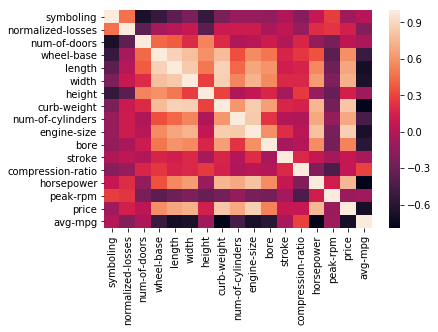

In [23]:
corr = dataDF.corr()
corr_map = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [24]:
corr['avg-mpg']

symboling            0.000297
normalized-losses   -0.199398
num-of-doors        -0.026348
wheel-base          -0.511871
length              -0.693200
width               -0.665184
height              -0.079321
curb-weight         -0.783584
num-of-cylinders    -0.459823
engine-size         -0.670689
bore                -0.590022
stroke              -0.043405
compression-ratio    0.296318
horsepower          -0.791395
peak-rpm            -0.083830
price               -0.684201
avg-mpg              1.000000
Name: avg-mpg, dtype: float64

* **avg-mpg** positively correlates with compression-ratio
* **horsepower, curb-weight,engine-size** negatively correlates

In [25]:
plot_color = "#55AA33"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]
figalpha = 0.5
axalpha = 0

left   =  0.10  # the left side of the subplots of the figure
right  =  0.95    # the right side of the subplots of the figure
bottom =  0.2    # the bottom of the subplots of the figure
top    =  0.3    # the top of the subplots of the figure
wspace =  0.1     # the amount of width reserved for blank space between subplots
hspace = 0.1 # the amount of height reserved for white space between subplots
y_title_margin = 1.0 # The amount of space above titles

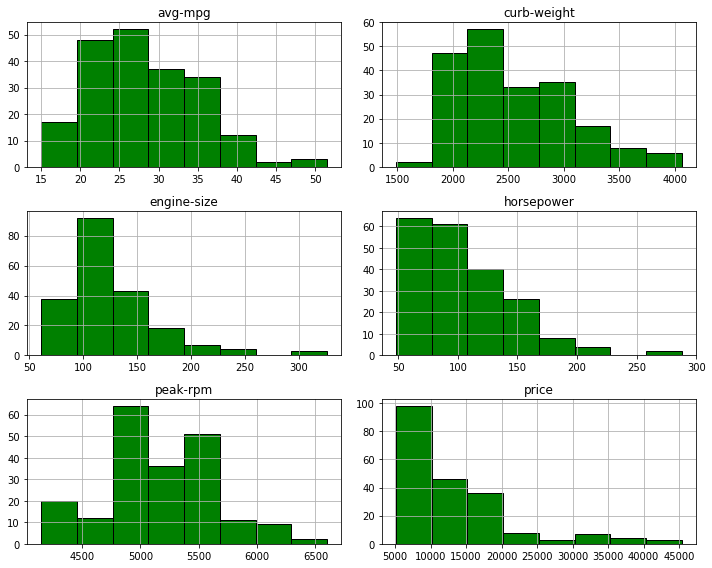

In [26]:
## undestanding few features

dataDF[['engine-size','peak-rpm','curb-weight','horsepower','price','avg-mpg']] \
.hist(figsize=(10,8),bins=8,color='g',linewidth='1',edgecolor='k')
plt.tight_layout()
plt.show()

c:\users\h213561\appdata\local\continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'engine-size')

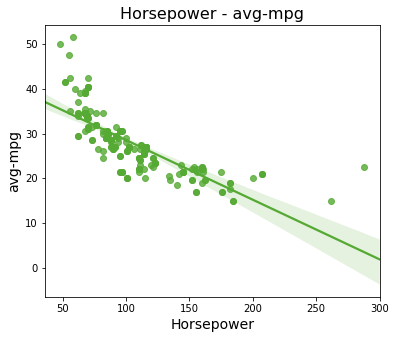

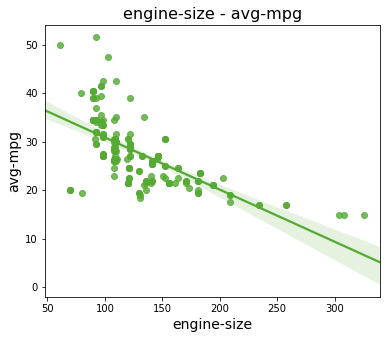

In [27]:

fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) 
fig.patch.set_alpha(0.5)
ax.set_title("Horsepower - avg-mpg", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax8=sns.regplot("horsepower",'avg-mpg', data=dataDF, color=plot_color)
gax8.set_ylabel('avg-mpg',fontsize=14 )
gax8.set_xlabel('Horsepower',fontsize=14)



fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("engine-size - avg-mpg", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax8=sns.regplot("engine-size",'avg-mpg', data=dataDF, color=plot_color)
gax8.set_ylabel('avg-mpg',fontsize=14 )
gax8.set_xlabel('engine-size',fontsize=14)

### 4.1 Feature Engineering

In [28]:
cat_vars = dataDF.select_dtypes(include = ["object"]).columns
num_vars = dataDF._get_numeric_data().columns

In [29]:
print("Total no cat vars : {0} \nTotal no num vars : {1}\n".format(len(cat_vars),len(num_vars)))
print(cat_vars)
print(num_vars)


Total no cat vars : 8 
Total no num vars : 17

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')
Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'price', 'avg-mpg'],
      dtype='object')


We can code few cat variables as binary

In [30]:
###  cat vars code
binary = ['fuel-type','aspiration','engine-location']
cat = ['make','body-style','engine-type','fuel-system','drive-wheels']

##  binary categories label encoder
binary_style = LabelBinarizer()

for var in binary:
    dataDF[var] = binary_style.fit_transform(dataDF[var])

In [31]:
dataDF.shape

(205, 25)

In [32]:
dataDF.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
price                0
avg-mpg              0
dtype: int64

In [33]:
## onehot encoding for categorical variables 
def onehotEncoding(df,features):

    for feature in features:
        dummies = pd.get_dummies(df[feature])
        df = pd.concat([df,dummies], axis=1) 
        df.drop([feature], axis=1, inplace=True)
    return df

In [34]:
dataDF=onehotEncoding(dataDF,cat)

In [35]:
dataDF.shape

(205, 65)

* In all we have 65 variables. 
* We will make **avg-mpg** as response variable and **Remaining varaibles** as Predictors.

In [36]:
# Helper function
def splitData(df, label):
    
    y = df[label]
    X = df.drop(label, axis = 1)
    return X, y

In [37]:
X, y = splitData(dataDF, label = "avg-mpg")

### 4.2  Feature Selection

In [38]:
# feature selection using cross validation
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

pipe = PipelineRFE(
    [
        ('std_scaler', preprocessing.StandardScaler()),
        ("ET", ExtraTreesRegressor(random_state=42, n_estimators=25))
    ]
)

In [39]:
feature_selector_cv = feature_selection.RFECV(pipe, cv=5, step=1, scoring="neg_mean_squared_error")
feature_selector_cv.fit(X, y)

RFECV(cv=5,
   estimator=PipelineRFE(memory=None,
      steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ET', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity...estimators=25, n_jobs=1,
          oob_score=False, random_state=42, verbose=0, warm_start=False))]),
   n_jobs=1, scoring='neg_mean_squared_error', step=1, verbose=0)

In [40]:
print(feature_selector_cv.n_features_)
cv_grid_rmse = np.sqrt(-feature_selector_cv.grid_scores_)
print(cv_grid_rmse)

12
[3.95193117 3.00452951 2.88839917 2.88812252 3.11498189 2.85384875
 3.04071879 2.93774329 2.90524538 2.90294249 2.7477945  2.73021897
 2.92579979 3.0117487  2.75825219 2.94084275 2.92937719 3.01073494
 3.10998675 2.93255969 2.97562881 3.06307736 2.98138877 3.01039208
 3.15222415 3.09733103 3.01278188 3.00124169 3.08810211 2.94167863
 2.87717951 3.02489798 2.94646907 2.98876367 2.99383138 2.89481589
 2.94085901 3.14451532 2.98435236 2.85225662 2.98550711 2.86659652
 3.07723189 2.95994133 2.98974475 3.15602807 3.14371475 2.91861611
 2.9941025  3.08762471 3.00462668 3.15759124 3.27960854 2.9618175
 3.06458289 3.03029001 2.9416385  3.12974837 3.04854095 3.05961898
 2.93517008 3.10185562 2.88993105 2.9964024 ]


* feature selection has given out 12 features. Lets print them 

In [41]:
feature_names = (X.columns)
selected_features = feature_names[feature_selector_cv.support_].tolist()
print( selected_features)

['wheel-base', 'length', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'compression-ratio', 'horsepower', 'price', 'mpfi', 'fwd']


## 5. Modeling

In [42]:
X =  X[selected_features]

In [43]:
# split data into train test
def trainingTesting(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=10)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = trainingTesting(X, y)

In [44]:
X_train.shape

(184, 12)

In [45]:
X_train.head()

,wheel-base,length,height,curb-weight,num-of-cylinders,engine-size,bore,compression-ratio,horsepower,price,mpfi,fwd
10,101.2,176.8,54.3,2395,4,108,3.50,8.8,101,16430,1,0
167,98.4,176.2,52.0,2540,4,146,3.62,9.3,116,8449,1,0
178,102.9,183.5,52.0,2976,6,171,3.27,9.3,161,16558,1,0
6,105.8,192.7,55.7,2844,5,136,3.19,8.5,110,17710,1,1
75,102.7,178.4,54.8,2910,4,140,3.78,8.0,175,16503,1,0


In [46]:
# helper function 
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [47]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

### We will use  GridSearchCV to select hyper parameters using cross validation 

In [48]:
rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 30],
    'max_features': [3,4,5],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_rf = GridSearchCV(estimator = rf, param_grid = rf_param_grid,  scoring='neg_mean_squared_error',
                          cv = 3, n_jobs = -1, verbose = 2)
grid_rf.fit(X_train, y_train)
rfResultDF = pd.DataFrame(grid_rf.cv_results_)[['mean_test_score', 'params']]

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   16.7s finished
c:\users\h213561\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\h213561\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\h213561\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will

In [49]:
rfResultDF

,mean_test_score,params
0,-6.710815,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
1,-6.829864,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
2,-6.679861,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
3,-6.594353,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
4,-6.507683,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
5,-6.493115,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
6,-6.468608,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
7,-6.234090,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
8,-6.358154,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."
9,-5.853019,"{'bootstrap': True, 'max_depth': 10, 'max_feat..."


In [50]:
grid_rf.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 4, 'n_estimators': 100}

In [51]:
model_rf = RandomForestRegressor(n_estimators=200,max_depth = 10, max_features = 5) 
model_rf.fit(X_train, y_train)
rfTrainPred = model_rf.predict(X_train)
rfTrainError  = rmsle(y_train,rfTrainPred)
print("Random forest Training RMSE : {0}".format(rfTrainError))

rfTestPred = model_rf.predict(X_test)
rfTestError =  rmsle(y_test,rfTestPred)
print("Random forest Testing RMSE : {0}".format(rfTestError))
print("Random forest Testing R Squared : {0}".format( str(round(100 * r2_score(y_test, rfTestPred), 2)) + "%"))

Random forest Training RMSE : 0.7542145790569792
Random forest Testing RMSE : 2.364833625707942
Random forest Testing R Squared : 88.38%


In [52]:
model_linear = linear_model.LinearRegression()
model_linear.fit(X_train, y_train)
linearTestPred = model_linear.predict(X_test)
print("Linear regression Testing R Squared : {0} ".format( str(round(100 * r2_score(y_test, linearTestPred), 2)) + "%"))
print("Linear regression Testing RMSE: {0}".format(str(round(mean_squared_error(y_test, linearTestPred), 2))))

Linear regression Testing R Squared : 74.07% 
Linear regression Testing RMSE: 12.49


In [53]:
print( model_linear.coef_)

[ 4.04269288e-02 -9.78318944e-02  1.27390181e-01 -7.92063417e-03
  1.00030411e-01  4.95978105e-02 -1.42277447e+00  5.11359037e-01
 -6.69226517e-02 -2.12328871e-05 -2.26287986e-02  3.97706783e-01]


### Question 4 (60 Points)
    A. Explain each and every of your design choices (e.g., preprocessing, model selection, hyper parameters, evaluation criteria). Compare and contrast your choices with alternative methodologies. 

    B. Describe how you would improve the model in Question 3 if you had more time.


### B. Describe how you would improve the model in Question 3 if you had more time.



* The model is already giving good accuracy close to 90%. We can further improve the model by 
        1. Trying more complex model like XGboost, GBM, Neural nets
        2. Ensembling many models and predicting the outcome would usually improve final result.
        3. Adding more data. Try get more data from internet. We can generate new data using existing using SMOTE. 

* I would love to work on car similarity recommendation. 
* Brief Idea:
           1. Represent  the car object in certain dimension(n-dimesion) depending on features.
           2. Select a distance measure to find similar car to the query/given car.
           3. As we have mixture of variables(numeric+categorical), we can make use of **GOWER Distance**